# Time Series Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('AirPassengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [4]:
#Checking datatype of all columns
print(df.dtypes)
#check for Month column
df.Month[1]

Month         object
Passengers     int64
dtype: object


'1949-02'

In [5]:
df['Month']=pd.to_datetime(df['Month'],infer_datetime_format=True)
df.Month[1]

Timestamp('1949-02-01 00:00:00')

In [6]:
# set Month column as index
new_df=df.set_index(['Month'])
new_df.head(5)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


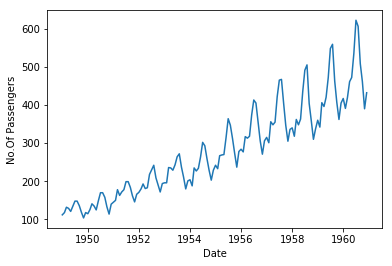

In [7]:
plt.xlabel('Date')
plt.ylabel('No.Of Passengers')
plt.plot(new_df)
plt.show()

# Check for Stationarity

In [8]:
#rolling statistics
rolmean=new_df.rolling(window=12).mean()
rolstd=new_df.rolling(window=12).std()
print(rolmean,rolstd)

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01  126.666667
1950-01-01  126.916667
1950-02-01  127.583333
1950-03-01  128.333333
1950-04-01  128.833333
1950-05-01  129.166667
1950-06-01  130.333333
1950-07-01  132.166667
1950-08-01  134.000000
1950-09-01  135.833333
1950-10-01  137.000000
1950-11-01  137.833333
1950-12-01  139.666667
1951-01-01  142.166667
1951-02-01  144.166667
1951-03-01  147.250000
1951-04-01  149.583333
1951-05-01  153.500000
1951-06-01  155.916667
...                ...
1958-07-01  376.333333
1958-08-01  379.500000
1958-09-01  379.500000
1958-10-01  380.500000
1958-11-01  380.916667
1958-12-01  381.000000
1959-01-01  382.666667
1959-02-01  384.666667
1959-03-01  388.333333
1959-04-01  392.333333
1959-05-01 

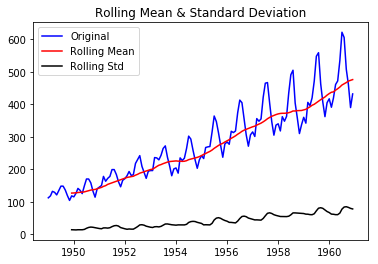

In [9]:
#plot rolling average
orig = plt.plot(new_df,color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [10]:
# Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(new_df['Passengers'])
print(dftest)

(0.8153688792060552, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [11]:
dfoutput = pd.Series(dftest[0:4], 
                     index=['Test Statistic','p-value',
                            '#Lags Used',
                            'Number of Observations Used'])
print(dfoutput)

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64


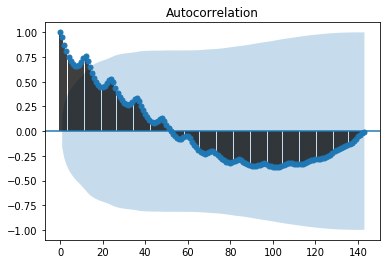

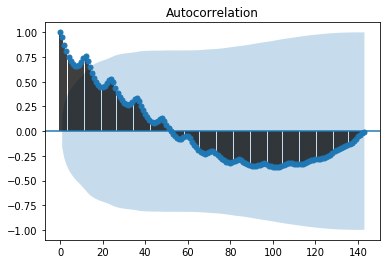

In [12]:
# Check for Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(new_df)

In [13]:
# How does autocorrelation happens?? 
# Takes correlation between two time series data, 1 - actual and the other shifted series.
# By default it takes time lag=1
new_df.shift(1)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,112.0
1949-03-01,118.0
1949-04-01,132.0
1949-05-01,129.0
1949-06-01,121.0
1949-07-01,135.0
1949-08-01,148.0
1949-09-01,148.0


# Converting into Stationary series

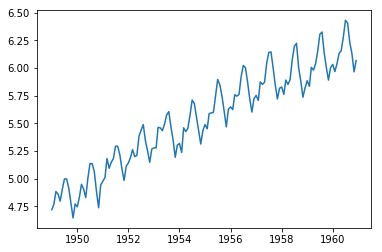

In [14]:
# Log Transform
new_df_log=np.log(new_df)
plt.plot(new_df_log)
plt.show()

In [15]:
#check for stationarity
dftest_log = adfuller(new_df_log['Passengers'])
dfoutput_log = pd.Series(dftest_log[0:4], 
                     index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput_log)

Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64


In [16]:
# first order differencing
new_df_diff=new_df.diff(periods=1)
new_df_diff = new_df_diff[1:]
new_df_diff.head(5)

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0


In [17]:
#check for stationarity
dftest_diff = adfuller(new_df_diff['Passengers'])
dfoutput_diff = pd.Series(dftest_diff[0:4], 
                     index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput_diff)

Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
dtype: float64


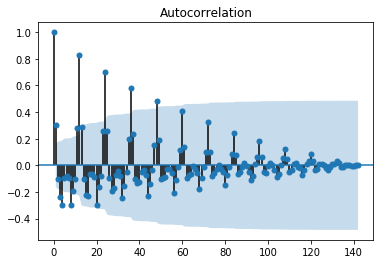

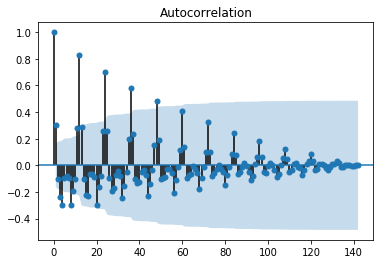

In [18]:
plot_acf(new_df_diff)

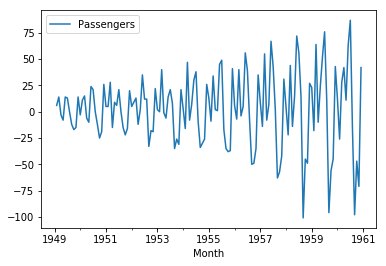

In [19]:
new_df_diff.plot()

# Train and Test set

In [20]:
X = new_df.values
train = X[0:110] 
test = X[111:]  
predictions = []

# Build the ARIMA model

In [57]:
from statsmodels.tsa.arima_model import ARIMA
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(4, 1, 1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

988.1520041905276


In [22]:
print(train.size)
print(test.size)

110
33


In [23]:
predictions= model_arima_fit.forecast(steps=33)[0]
predictions

array([327.10547557, 325.41125945, 329.21441803, 330.21924408,
       332.64850732, 334.35268829, 336.4259584 , 338.3113508 ,
       340.29237872, 342.22472523, 344.18185207, 346.12636496,
       348.07729874, 350.02496409, 351.97429317, 353.92277536,
       355.87168865, 357.82038249, 359.76918804, 361.71793672,
       363.66671435, 365.61547725, 367.56424765, 369.51301423,
       371.46178275, 373.41055028, 375.35931832, 377.3080861 ,
       379.25685401, 381.20562185, 383.15438973, 385.10315759,
       387.05192546])

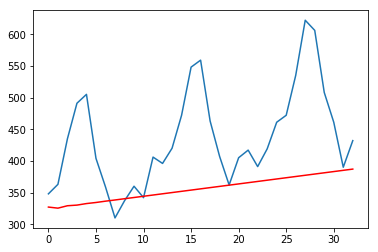

In [24]:
plt.plot(test)
plt.plot(predictions,color='red')

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse=mean_squared_error(test,predictions)
rmse=sqrt(mse)
print(rmse)

107.10099304606004


In [26]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [33]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 1294.6405028316146
(0, 0, 1) 1164.7123618600544
(0, 1, 0) 1020.3638353026379
(0, 1, 1) 1009.0016799883831
(0, 1, 2) 1006.540175214395
(0, 1, 3) 997.3102280254463
(0, 1, 4) 982.7574545380737
(0, 2, 0) 1051.8324082074832
(0, 2, 1) 1018.6732007286878
(0, 2, 2) 1006.7361717607045
(0, 2, 3) 1004.8797051789578
(1, 0, 0) 1032.651563937741
(1, 0, 1) 1018.9176968522024
(1, 0, 2) 1018.6017494787566
(1, 0, 3) 1020.5068924324464
(1, 0, 4) 1741.755619076578
(1, 1, 0) 1013.9223932284542
(1, 1, 1) 1005.7512298572933
(1, 1, 2) 989.8755502048077
(1, 1, 3) 991.8658500699974
(1, 1, 4) 984.7499519134617
(1, 2, 0) 1049.2366318256013
(1, 2, 1) 1011.6668918056047
(1, 2, 2) 1003.8109250410936
(1, 2, 3) 1004.8888412439121
(1, 2, 4) 1006.6766285619804
(2, 0, 0) 1023.7748954967408
(2, 0, 1) 1017.1923458802519
(2, 0, 3) 1051.7638896084313
(2, 1, 0) 1009.2850093525194
(2, 1, 1) 988.7875378585306
(2, 1, 2) 991.7311939773324
(2, 1, 3) 990.7105964821267
(2, 1, 4) 976.5924747571682
(2, 2, 0) 1039.21727000007

In [58]:
model_arima = ARIMA(train,order=(4, 2, 4))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

969.9489064951533


In [55]:
predictions= model_arima_fit.forecast(steps=33)[0]
predictions
mse=mean_squared_error(test,predictions)
rmse=sqrt(mse)
print(rmse)

56.196815436640385


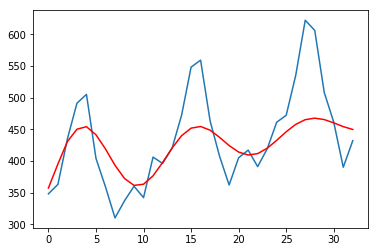

In [37]:
plt.plot(test)
plt.plot(predictions,color='red')

In [56]:
predictions= model_arima_fit.forecast(steps=38)[0]
predictions

array([357.17063379, 395.18056475, 430.6780959 , 449.99232268,
       453.9961144 , 441.17942113, 418.8397432 , 393.04659248,
       372.23840285, 361.32971954, 363.19001447, 376.43580059,
       397.34688581, 420.25765685, 439.75589532, 451.67666926,
       454.31948828, 448.46912658, 437.07872713, 424.21218908,
       413.94763527, 409.28189001, 411.48932106, 419.93897585,
       432.45452914, 446.01558673, 457.62527697, 465.0772637 ,
       467.45238197, 465.2298856 , 460.03054474, 454.08725128,
       449.61027894, 448.21830407, 450.57777739, 456.32230286,
       464.24684257, 472.69947987])